       Soil Moisture    Temperature  Soil Humidity           Time  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       45.484070      22.536100      45.016790      55.253650   
std        25.993998      13.251352      14.726676      32.093033   
min         1.000000       0.000000      20.000000       0.000000   
25%        23.000000      11.000000      32.000000      28.000000   
50%        45.000000      23.000000      45.000000      55.000000   
75%        68.000000      34.000000      58.000000      83.000000   
max        90.000000      45.000000      70.000000     110.000000   

       Air temperature (C)  Wind speed (Km/h)  Air humidity (%)  \
count         23995.000000       23995.000000      23995.000000   
mean             24.263780           9.896898         58.521052   
std               6.756751           4.325666         30.073448   
min              11.220000           0.000000          0.590000   
25%              18.580000           6.8300

<ipython-input-39-a7be7b81d4ba>:22: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


   Soil Moisture  Temperature  Soil Humidity  Time  Air temperature (C)  \
0             54           22             70    21                19.52   
1             12           20             40   104                19.49   
2             34           26             35    62                19.47   
3              7           44             44    93                19.54   
4             50           38             23    92                19.61   

   Wind speed (Km/h)  Air humidity (%)  Wind gust (Km/h)  Pressure (KPa)  \
0               2.13             55.04              6.30          101.50   
1               2.01             55.17             10.46          101.50   
2               1.90             55.30             14.63          101.51   
3               2.28             54.20             16.08          101.51   
4               2.66             53.09             17.52          101.51   

  status  
0     ON  
1    OFF  
2     ON  
3    OFF  
4    OFF  
       Soil Moisture  Temp

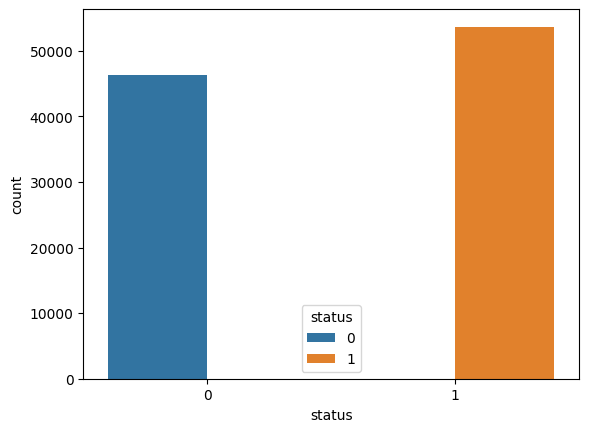

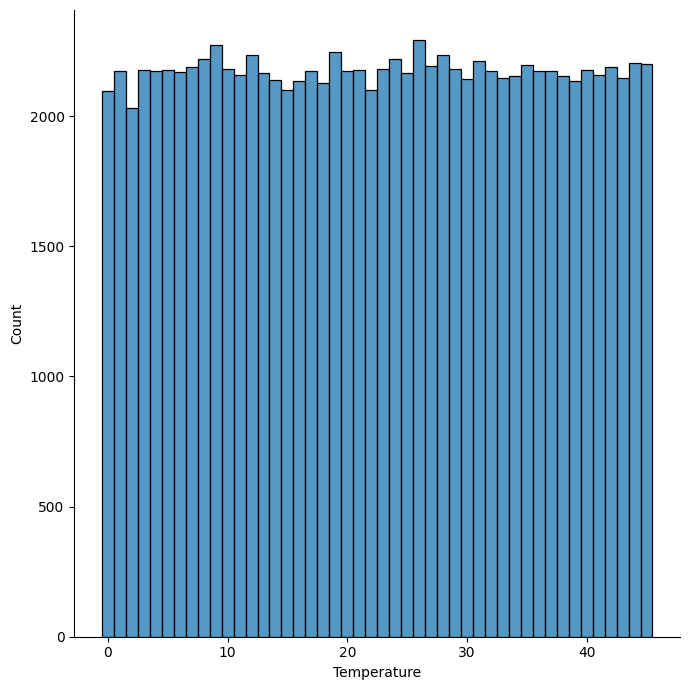

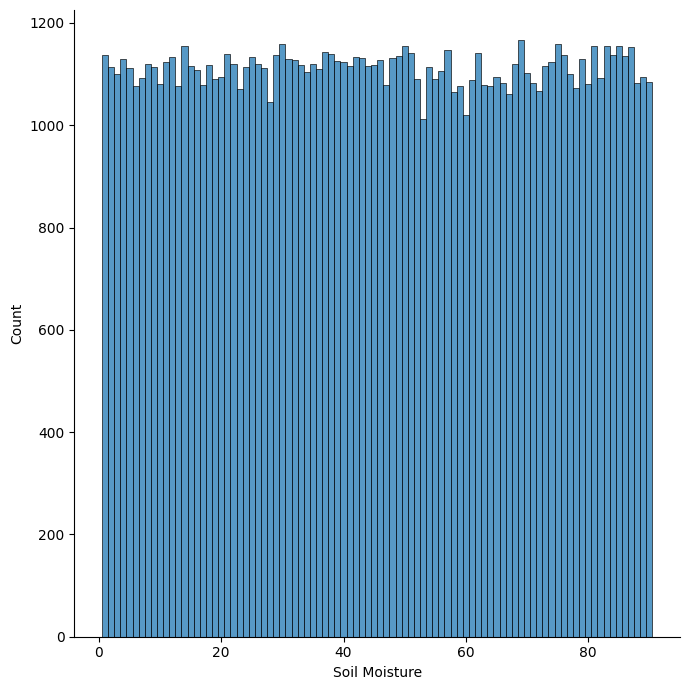

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load the dataset
file_path = 'TARP[1].csv'
names = ['Soil Moisture', 'Temperature', 'Soil Humidity', 'Time', 'Air temperature (C)', 'Wind speed (Km/h)',
         'Air humidity (%)', 'Wind gust (Km/h)', 'Pressure (KPa)', 'ph', 'rainfall', 'N', 'P', 'K', 'status']
irrigation_df = pd.read_csv(file_path, names=names, header=0)

# Data preprocessing
data = irrigation_df.drop(['ph', 'rainfall', 'N', 'P', 'K'], axis=1)
print(data.describe())
print(data.head())
print(data.tail())
# Fill missing values with mean
data = data.fillna(data.mean())
print(data.head())
print(data.tail())
# Map 'status' column to binary values
data['status'] = data['status'].map({'ON': 1, 'OFF': 0})

# Exploratory data analysis
sns.countplot(x="status", hue="status", data=data)
sns.displot(data, x="Temperature", binwidth=3, bins=20, discrete=True, height=7)
sns.displot(data, x="Soil Moisture", binwidth=3, bins=20, discrete=True, height=7)




Accuracy: 0.999
Precision: 0.998
Recall: 1.000
F1 Score: 0.999
AUC: 1.000
Execution time: 16.227


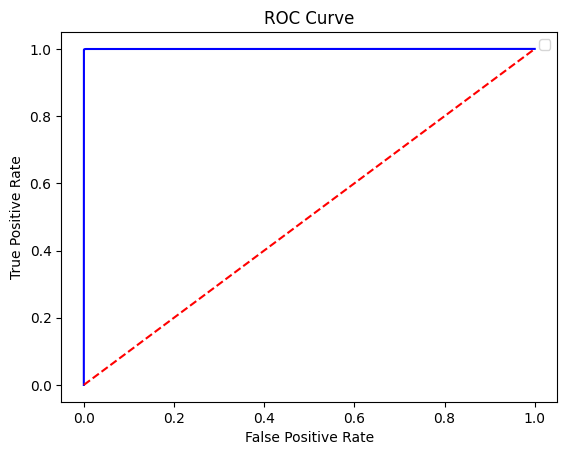

In [40]:
# Model training and evaluation
start=time.time()
X = data.iloc[:, :-1].values
y = data["status"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11111)
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred_class_rf)
precision = precision_score(y_test, y_pred_class_rf)
recall = recall_score(y_test, y_pred_class_rf)
f1 = f1_score(y_test, y_pred_class_rf)
roc_auc = roc_auc_score(y_test, y_pred_prob_rf[:, 1])
end=time.time()
# Print performance metrics
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))
print("AUC: {:.3f}".format(roc_auc))
print("Execution time: {:.3f}".format(end-start))
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf[:, 1])
plt.plot(fpr, tpr, 'b-')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model training and evaluation
start=time.time()
X = data.iloc[:, :-1].values
y = data["status"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11111)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
end=time.time()
# Print performance metrics
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R^2 Score: {:.3f}".format(r2))
print("Execution time: {:.3f}".format(end-start))

Mean Squared Error (MSE): 0.183
Root Mean Squared Error (RMSE): 0.428
R^2 Score: 0.263
Execution time: 0.053


Accuracy: 0.999
Precision: 0.999
Recall: 1.000
F1 Score: 0.999
AUC: 0.999
Execution time: 0.266


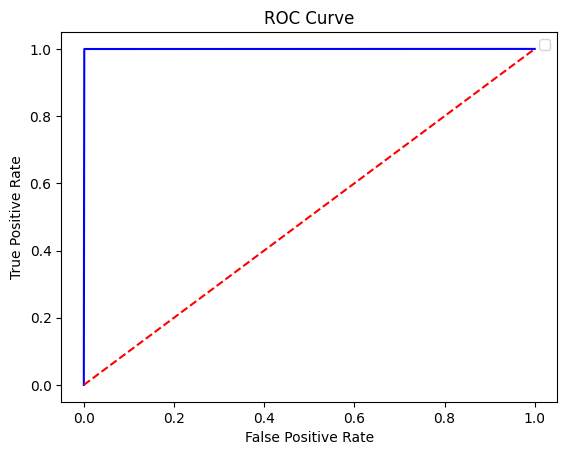

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Model training and evaluation
start=time.time()
X = data.iloc[:, :-1].values
y = data["status"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11111)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_class_dt = dt_model.predict(X_test)
y_pred_prob_dt = dt_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred_class_dt)
precision = precision_score(y_test, y_pred_class_dt)
recall = recall_score(y_test, y_pred_class_dt)
f1 = f1_score(y_test, y_pred_class_dt)
roc_auc = roc_auc_score(y_test, y_pred_prob_dt[:, 1])
end=time.time()
# Print performance metrics
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))
print("AUC: {:.3f}".format(roc_auc))
print("Execution time: {:.3f}".format(end-start))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_dt[:, 1])
plt.plot(fpr, tpr, 'b-')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Accuracy: 0.863
Precision: 0.858
Recall: 0.891
F1 Score: 0.874
AUC: 0.940
Execution time: 837.025


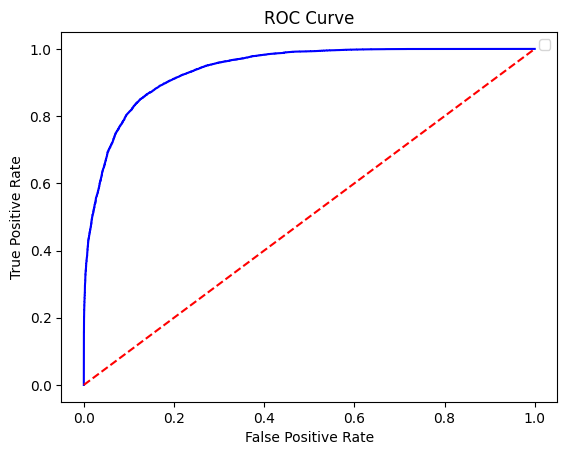

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Model training and evaluation
start=time.time()
X = data.iloc[:, :-1].values
y = data["status"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11111)

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

y_pred_class_svm = svm_model.predict(X_test)
y_pred_prob_svm = svm_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred_class_svm)
precision = precision_score(y_test, y_pred_class_svm)
recall = recall_score(y_test, y_pred_class_svm)
f1 = f1_score(y_test, y_pred_class_svm)
roc_auc = roc_auc_score(y_test, y_pred_prob_svm[:, 1])
end=time.time()
# Print performance metrics
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))
print("AUC: {:.3f}".format(roc_auc))
print("Execution time: {:.3f}".format(end-start))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_svm[:, 1])
plt.plot(fpr, tpr, 'b-')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Accuracy: 0.658
Precision: 0.887
Recall: 0.414
F1 Score: 0.565
AUC: 0.789
Execution time: 4.099


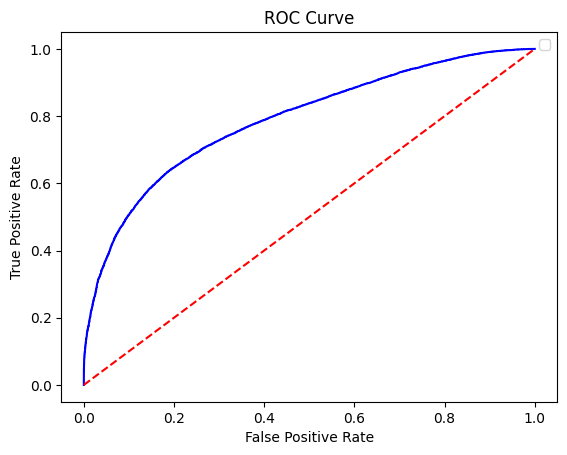

In [44]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Model training and evaluation
start=time.time()
X = data.iloc[:, :-1].values
y = data["status"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11111)

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

y_pred_class_sgd = sgd_model.predict(X_test)
y_pred_prob_sgd = sgd_model.decision_function(X_test)

accuracy = accuracy_score(y_test, y_pred_class_sgd)
precision = precision_score(y_test, y_pred_class_sgd)
recall = recall_score(y_test, y_pred_class_sgd)
f1 = f1_score(y_test, y_pred_class_sgd)
roc_auc = roc_auc_score(y_test, y_pred_prob_sgd)
end=time.time()
# Print performance metrics
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))
print("AUC: {:.3f}".format(roc_auc))
print("Execution time: {:.3f}".format(end-start))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_sgd)
plt.plot(fpr, tpr, 'b-')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Splitting the data into training and testing sets
start=time.time()
X = data.iloc[:, :-1].values
y = data["status"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11111)

# Training the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = nb_model.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
end=time.time()
# Printing the performance metrics
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))
print("Execution time: {:.3f}".format(end-start))

Accuracy: 0.756
Precision: 0.765
Recall: 0.787
F1 Score: 0.776
Execution time: 0.146
